# load data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\win10\.conda\envs\yyjj125\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [35]:
# load scenic or not data
image_files = ['senic/array_immagini224_completo11voti1.npy',
                 'senic/array_immagini224_completo11voti2.npy',
                 'senic/array_immagini224_completo11voti3.npy',
                 'senic/array_immagini224_completo11voti4.npy',
                 'senic/array_immagini224_completo11voti5.npy',
                 'senic/array_immagini224_completo11voti6.npy',
                 'senic/array_immagini224_completo11voti7.npy',
                 'senic/array_immagini224_completo11voti8.npy'] 
score_files = ['senic/array_voti_completo11voti1.npy',
              'senic/array_voti_completo11voti2.npy',
              'senic/array_voti_completo11voti3.npy',
              'senic/array_voti_completo11voti4.npy',
              'senic/array_voti_completo11voti5.npy',
              'senic/array_voti_completo11voti6.npy',
              'senic/array_voti_completo11voti7.npy',
              'senic/array_voti_completo11voti8.npy']

In [36]:
image = []
score = []

In [37]:
for image_data, score_data in zip(image_files, score_files):
    image_array = np.load(image_data, allow_pickle=True)
    score_array = np.load(score_data, allow_pickle=True)  
    image.append(image_array)
    score.append(score_array)   
    del image_array, score_array

In [38]:
image = np.concatenate(image, axis=0)
score= np.concatenate(score, axis=0)

In [40]:
# preprocess, reduce size and normalize 
image_pre = []
for i in range(len(image)):
    image_pre.append(tf.image.resize(image[i,:,:,:], [96,96]))
image = np.array(image_pre)
image  = image/255

In [33]:
tf.random.set_seed(22)

In [41]:
train, test, train_target, test_target = train_test_split(image, score, test_size=0.2)
indices = np.arange(len(train))
train_image, val_image, train_score, val_score = train_test_split(train, train_target, test_size=0.1)

In [42]:
train_score = tf.reduce_sum(train_score*[1,2,3,4,5,6,7,8,9,10], axis=1)
val_score   = tf.reduce_sum(val_score*[1,2,3,4,5,6,7,8,9,10], axis=1)
test_target  = tf.reduce_sum(test_target*[1,2,3,4,5,6,7,8,9,10], axis=1)

# train model VGG19

In [43]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

In [45]:
base_model.trainable = False

In [46]:
# add a new layer
inputs = Input(shape=(96, 96, 3))
x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(1, activation='linear')(x)
model = Model(inputs, outputs)

In [47]:
model.compile(optimizer=RMSprop(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=['mae'])

In [48]:
# train
history = model.fit(train_image, 
                    train_score,
                    validation_data=(val_image, val_score),
                    epochs=20,
                    batch_size=64)

Epoch 1/20
253/253 [==============================] - 203s 801ms/step - loss: 9.2536 - mae: 1.4199 - val_loss: 2.5872 - val_mae: 1.3214
Epoch 2/20
253/253 [==============================] - 205s 809ms/step - loss: 1.6272 - mae: 1.0163 - val_loss: 2.0936 - val_mae: 1.1593
Epoch 3/20
253/253 [==============================] - 211s 833ms/step - loss: 1.4452 - mae: 0.9553 - val_loss: 1.6018 - val_mae: 1.0076
Epoch 4/20
253/253 [==============================] - 214s 847ms/step - loss: 1.3568 - mae: 0.9255 - val_loss: 2.0759 - val_mae: 1.1545
Epoch 5/20
253/253 [==============================] - 214s 848ms/step - loss: 1.2970 - mae: 0.9022 - val_loss: 1.4141 - val_mae: 0.9491
Epoch 6/20
253/253 [==============================] - 216s 852ms/step - loss: 1.2490 - mae: 0.8865 - val_loss: 1.3177 - val_mae: 0.9161
Epoch 7/20
253/253 [==============================] - 215s 852ms/step - loss: 1.2336 - mae: 0.8813 - val_loss: 1.3636 - val_mae: 0.9276
Epoch 8/20
253/253 [============================

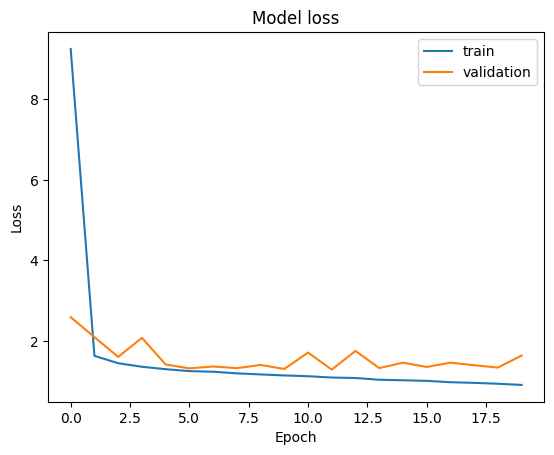

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [26]:
model.save('scenic_model/trained_model')

INFO:tensorflow:Assets written to: scenic_model/trained_model\assets


INFO:tensorflow:Assets written to: scenic_model/trained_model\assets


In [129]:
# model = tf.keras.models.load_model('scenic_model/trained_model')

In [50]:
from sklearn.metrics import r2_score

In [52]:
#evaluate model on the test set
test_loss, test_mae= model.evaluate(test, test_target)

print('test loss:', test_loss)
print('test MAE:', test_mae)

141/141 [==============================] - 55s 389ms/step - loss: 1.5379 - mae: 0.9730
test loss: 1.537909746170044
test MAE: 0.9730034470558167


In [53]:
y_test_pred = model.predict(test)

141/141 [==============================] - 54s 380ms/step


In [54]:
r2 = r2_score(test_target, y_test_pred)
print("R2: ", r2)

R2:  0.36111891423192566


# process all GSV

In [60]:
from PIL import Image
import os
import pandas as pd
import glob

In [64]:
boroughs = ['City_of_London','Hammersmith_and_Fulham',"Tower_Hamlets","Camden", "Greenwich", "Hackney",'kc',
            "Islington", "Lambeth", "Lewisham",
            "Southwark", "Wandsworth", "Westminster"]

In [39]:
base_dir = "G:/term1/dissertation2"

In [61]:
results_df = pd.DataFrame(columns=["Borough", "Image", "Score"])

In [55]:
results_dfs = []

In [57]:
for borough in boroughs:
    borough_dir = os.path.join(base_dir, borough)
    image_files = glob.glob(borough_dir + "\\*.png")
    images = []
    for image_file in image_files:
        image = Image.open(image_file)
        image_resized = image.resize((96, 96))
        image_array = np.array(image_resized) / 255.0
        images.append(image_array)
    images = np.array(images)
    # predict scores
    scores = model.predict(images)
    new_rows = [] 
    # add to df
    for i, score in enumerate(scores):     
        image_name = os.path.basename(image_files[i]) 
        image_name_without_extension = os.path.splitext(image_name)[0] 
        new_row = {"Borough": borough, "Image": image_name_without_extension, "Score": score[0]}
        new_rows.append(new_row)
    new_df = pd.DataFrame(new_rows)
    results_dfs.append(new_df)
results_df = pd.concat(results_dfs, ignore_index=True)

79/79 [==============================] - 30s 383ms/step


In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [57]:
random_seed = 88

In [ ]:
random_samples = results_df.sample(n=10, random_state=random_seed)

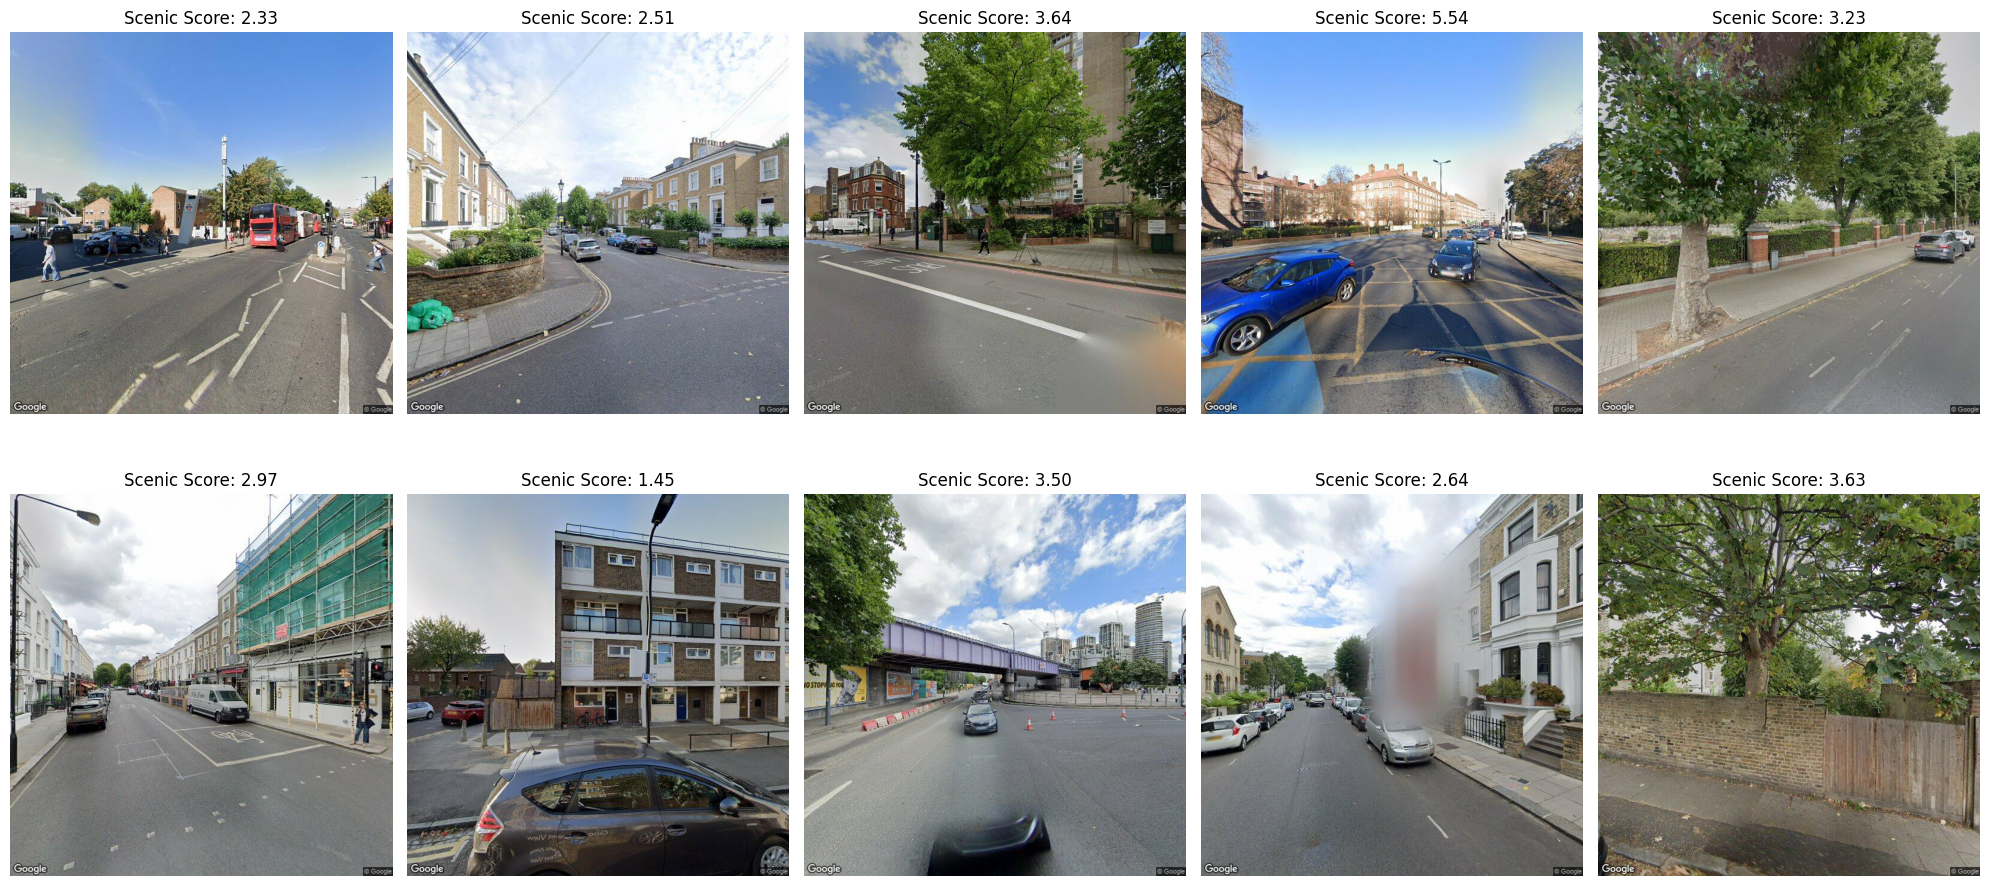

In [78]:
# plot
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, (index, row) in enumerate(random_samples.iterrows()):
    img_path = os.path.join(base_dir, row['Borough'], row['Image'] + ".png")
    img = mpimg.imread(img_path)
    row = i // 5
    col = i % 5
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Scenic Score: {row['Score']:.2f}")
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

In [79]:
results_df.head()

,Borough,Image,Score
0,City_of_London,GoogleSV_City_of_London_0_0,4.824893
1,City_of_London,GoogleSV_City_of_London_0_180,4.078924
2,City_of_London,GoogleSV_City_of_London_0_270,2.968327
3,City_of_London,GoogleSV_City_of_London_0_90,4.129668
4,City_of_London,GoogleSV_City_of_London_10_0,2.307268


In [80]:
results_df.shape

(34236, 3)

In [81]:
results_df.tail()

,Borough,Image,Score
34231,Westminster,GoogleSV_Westminster_23938_90,2.834680
34232,Westminster,GoogleSV_Westminster_23939_0,2.029601
34233,Westminster,GoogleSV_Westminster_23939_180,2.390487
34234,Westminster,GoogleSV_Westminster_23939_270,2.259508
34235,Westminster,GoogleSV_Westminster_23939_90,2.531114


In [82]:
# save to csv
results_df.to_csv("image_scores.csv", index=False)

In [1]:
# reference
# I acknowledge the use of ChatGPT 4.0 (Open AI, https://chat.openai.com) to debug.
# Federica (2023). Scenic Or Not dataset. Avaiable at https://github.com/federicasibilla/ScenicOrNot